## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

### Prepare
Check environment. Install packages if in Colab.


In [64]:
import sys
import os
import requests

import random 

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

sys.path.append('..')
import models_vit


### Define utils

In [65]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(image)
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def show_one(imgs, result):
    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(3, 5, 1)
    show_image(result, "result")
    
    if isinstance(imgs, list):
        idx = 0
        for x in range(1, 3):
            for y in range(1, 11):
                img = imgs[idx]
                idx+=1
                # print(x*5+y)
                plt.subplot(3, 10, (x)*10+y)
                show_image(img, "original")
    else:
        plt.subplot(3, 1, 2)
        show_image(imgs, "original")

    plt.show()

### Run MAE on the image

{0: [], 1: [], 2: [], 3: [], 4: []}
0 1253 [8107, 3396, 7949, 7531, 9725, 8477, 9790, 3602, 4652, 1289, 9563, 7927, 8730, 4392, 4121, 860, 6711, 3575, 9857, 5709]
1 1877 [1404, 5660, 6438, 1040, 9334, 1781, 7522, 8419, 1440, 1879, 3639, 8272, 4570, 9370, 3309, 7504, 2613, 7052, 2018, 1146]
2 928 [685, 8725, 5434, 5078, 6196, 4620, 5939, 5356, 2313, 7310, 2731, 5464, 7845, 969, 8328, 5785, 4082, 9144, 6897, 4299]
3 744 [1518, 1295, 7256, 275, 5621, 6841, 7909, 1096, 9164, 1384, 3844, 9078, 9119, 9321, 1817, 2290, 9928, 7506, 2172, 4358]
4 198 [7906, 3748, 3990, 1658, 6290, 3487, 3871, 879, 3914, 6613, 61, 3042, 1364, 8433, 7553, 1680, 8746, 1931, 4168, 5682]
['0.8418310880661011', '0.9212201833724976', '0.7998677492141724', '0.9006611108779907', '0.9303224682807922', '0.92365562915802', '0.9313414096832275', '0.4885757863521576', '0.8990580439567566', '0.7862591743469238', '0.9003480076789856', '0.854295015335083', '0.9208755493164062', '0.9024028778076172', '0.5165366530418396', '0.905

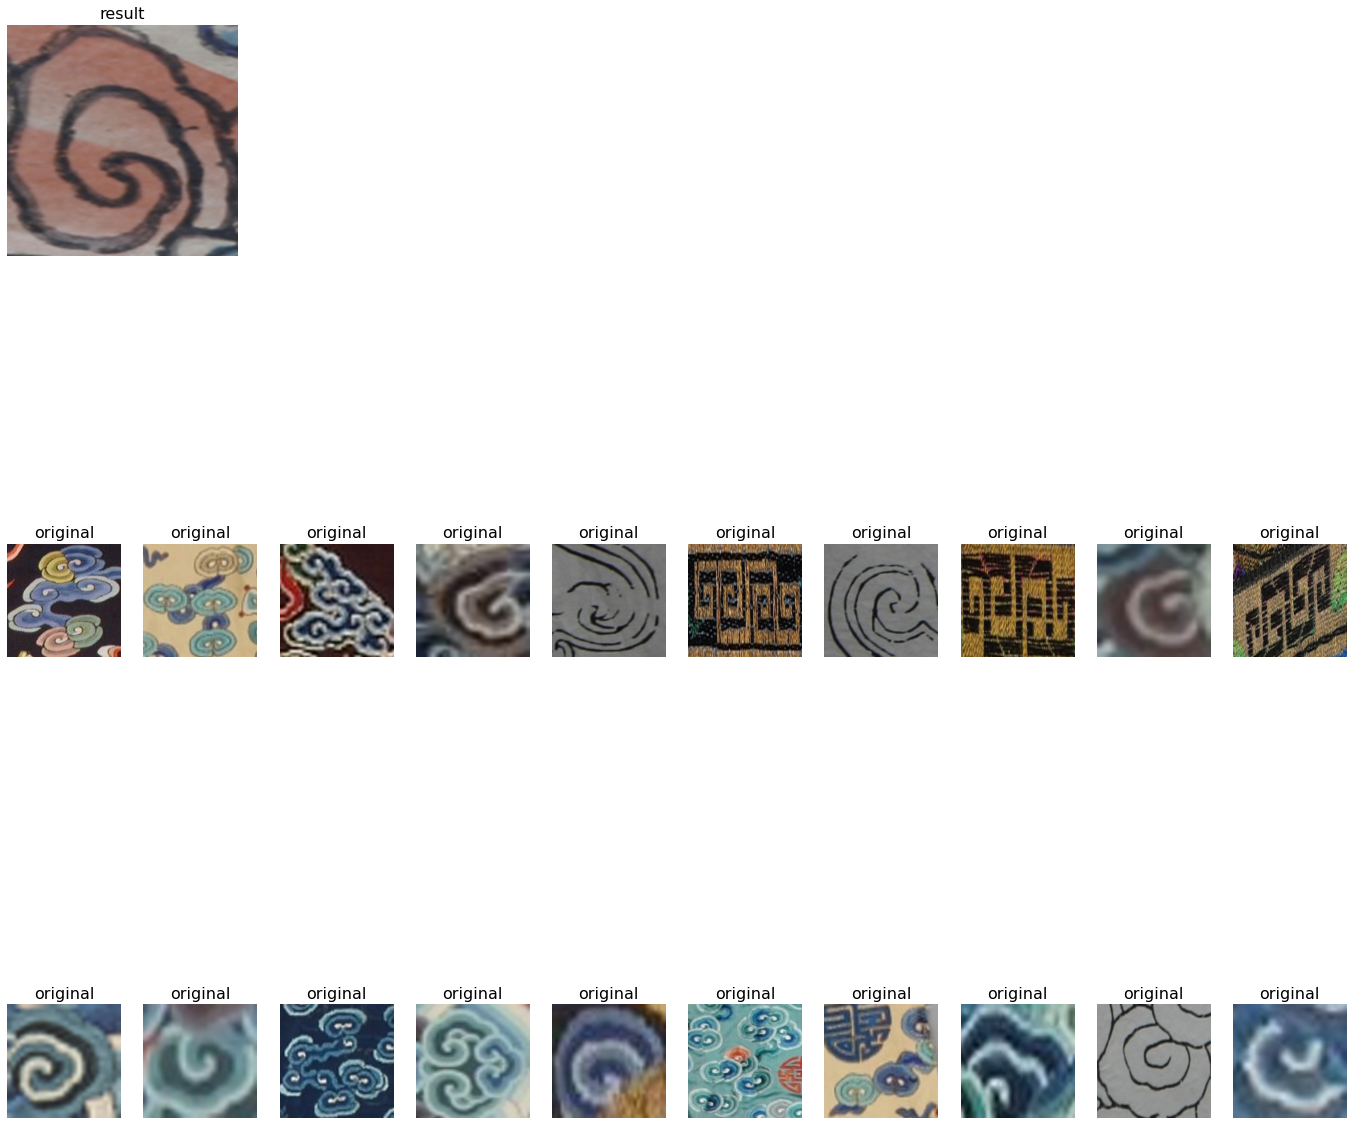

['0.9208673238754272', '0.9252657294273376', '0.9249252676963806', '0.6366334557533264', '0.9213504195213318', '0.912224531173706', '0.8849421143531799', '0.926217794418335', '0.8373879194259644', '0.9239358901977539', '0.9267237782478333', '0.4956423044204712', '0.9253048896789551', '0.9170967936515808', '0.9258610010147095', '0.5979567170143127', '0.8577766418457031', '0.9134993553161621', '0.924223780632019', '0.9195451140403748']
../godden/yunwen1.png
(224, 224, 3)


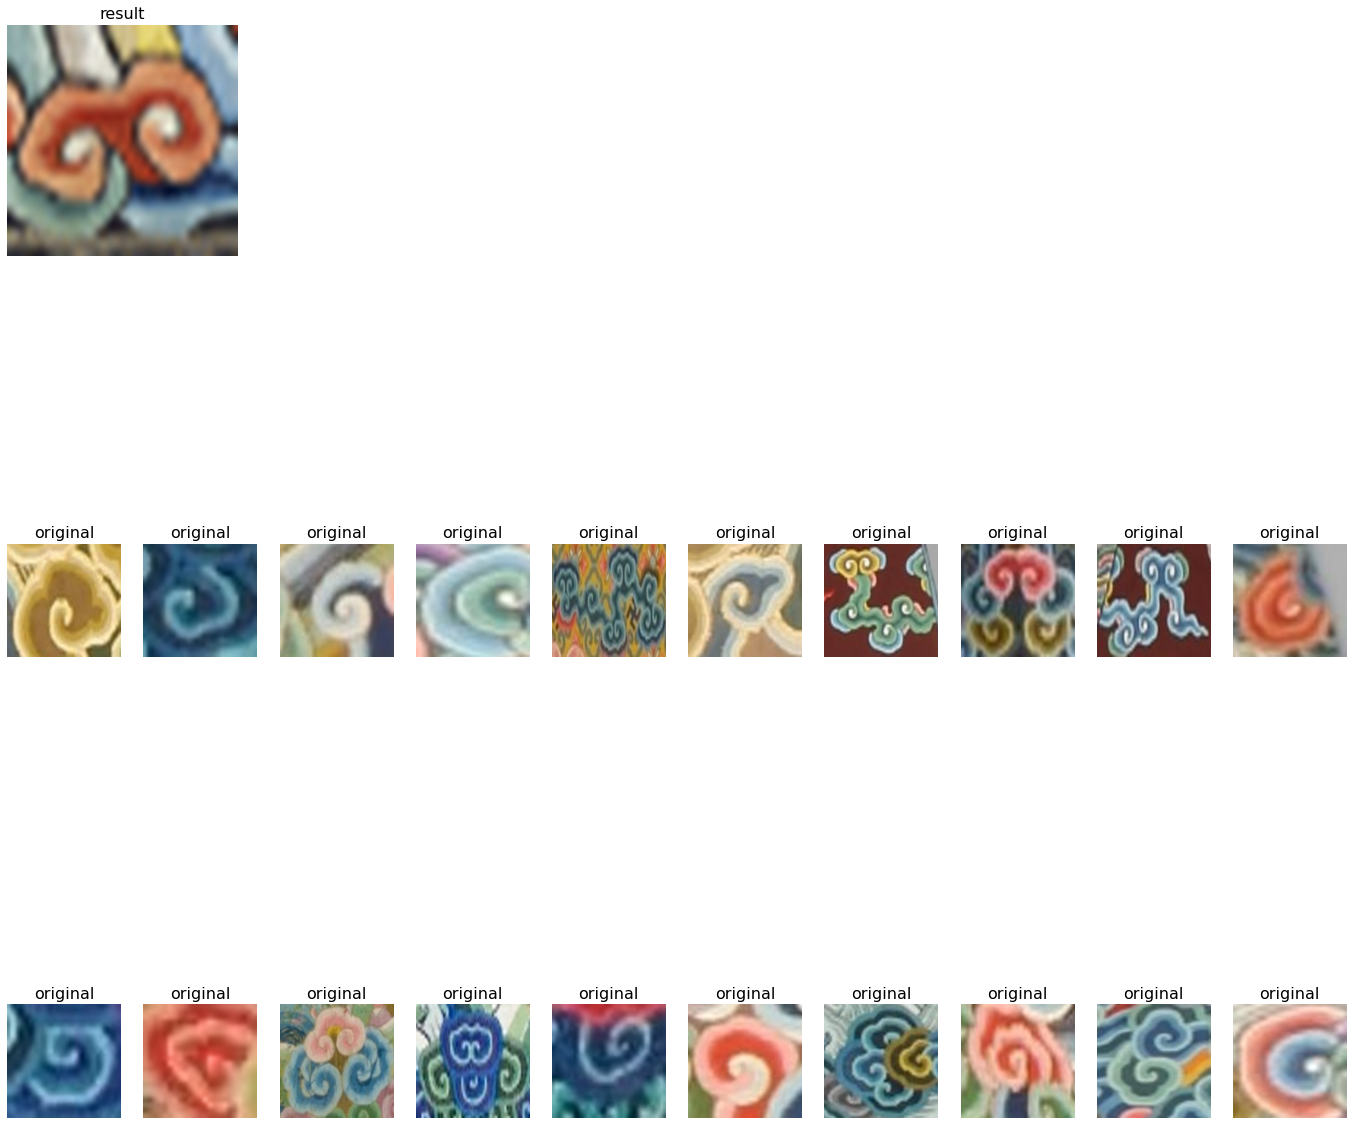

['0.9239940047264099', '0.9200160503387451', '0.9248405694961548', '0.3404764235019684', '0.9255444407463074', '0.9259233474731445', '0.924637496471405', '0.9242535829544067', '0.9239274263381958', '0.922525942325592', '0.9198271036148071', '0.926267147064209', '0.9229357242584229', '0.9248740077018738', '0.9255944490432739', '0.9239926934242249', '0.925256609916687', '0.9249356985092163', '0.9237135052680969', '0.9226377010345459']
../godden/yunwen2.png
(224, 224, 3)


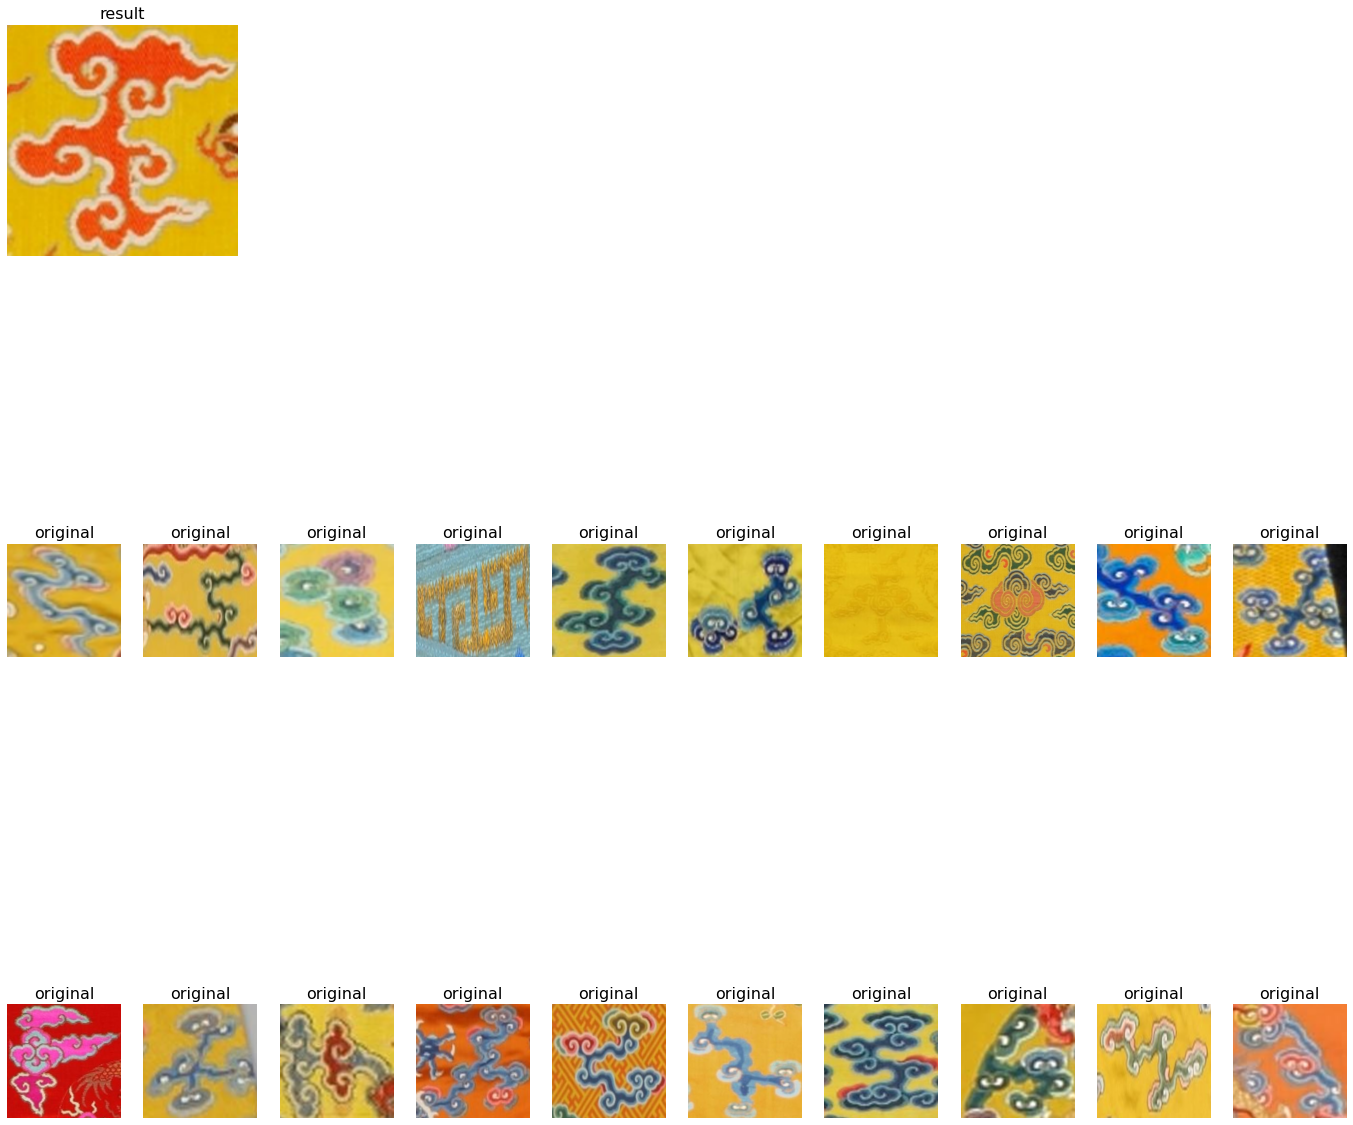

['0.9195483922958374', '0.9351510405540466', '0.9184874892234802', '0.8017593026161194', '0.8897583484649658', '0.7196179628372192', '0.4813286364078522', '0.9294811487197876', '0.9197195172309875', '0.5053361058235168', '0.9171826243400574', '0.9255806803703308', '0.8961138725280762', '0.9002985954284668', '0.9229332804679871', '0.8594793677330017', '0.8432130217552185', '0.4587445855140686', '0.7464276552200317', '0.8703047633171082']
../godden/yunwen3.png
(224, 224, 3)


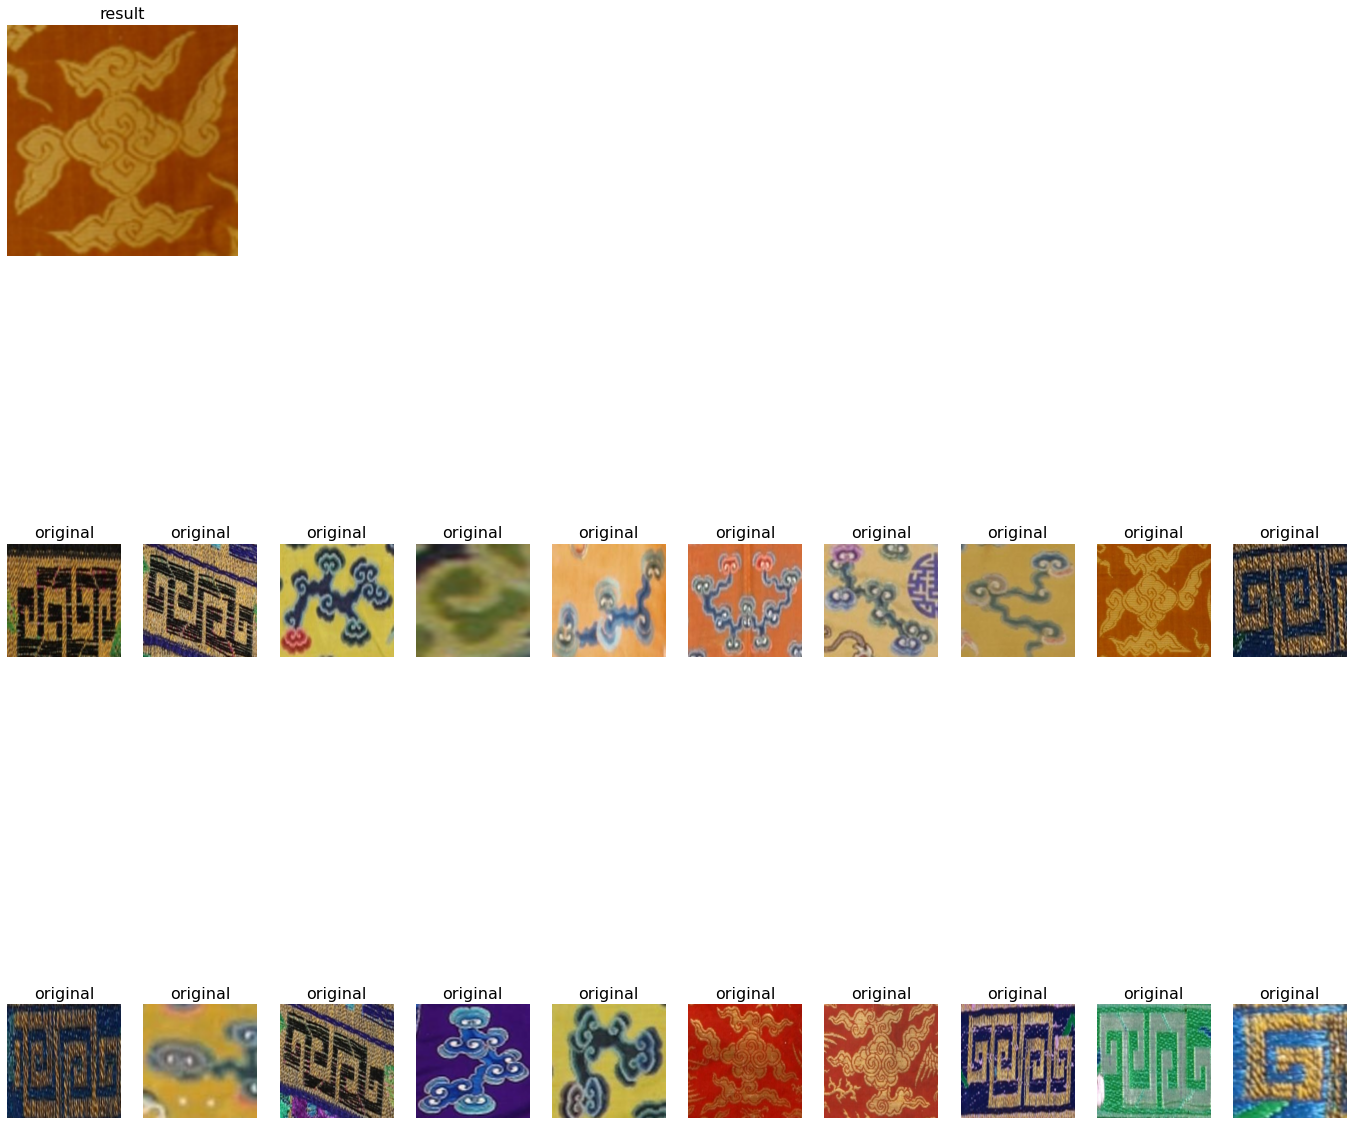

['0.5264180898666382', '0.9201532006263733', '0.5559226274490356', '0.6537851691246033', '0.9169650673866272', '0.9204971194267273', '0.8599893450737', '0.8799086213111877', '0.8807675242424011', '0.7587906718254089', '0.9180478453636169', '0.7441522479057312', '0.4759145677089691', '0.9015088081359863', '0.69755619764328', '0.9170072674751282', '0.8765377402305603', '0.9214034080505371', '0.7094020843505859', '0.9235080480575562']
../godden/yunwen4.png
(224, 224, 3)


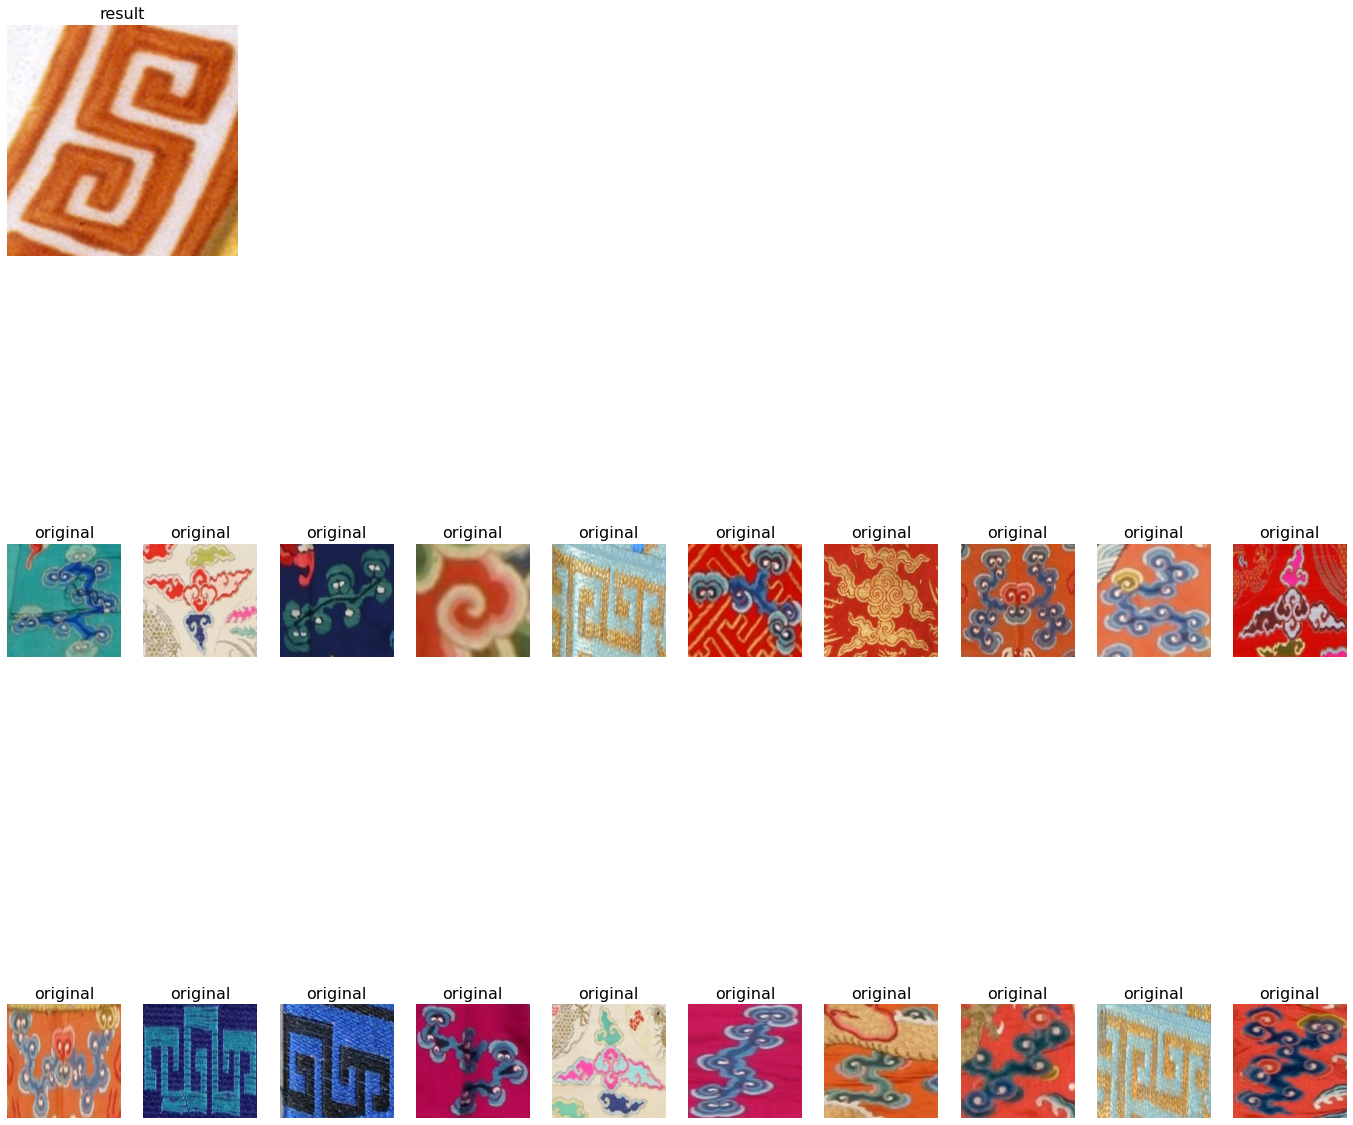

In [70]:
# make random mask reproducible (comment out to make it change)

idx = 330
flist = open("../test_images.txt").readlines()
rlist = open("../test_result.txt").readlines()

# flist = open("../all_train_images.txt").readlines()
# rlist = open("../all_train_results.txt").readlines()

preds = dict(zip(range(5), [[], [], [], [], []]))
print(preds)
for idx in random.sample(range(10000), k=5000):
    img_path = flist[idx].strip()
    pred = int(rlist[idx].strip().split(",")[0])
    # print(pred)
    preds[pred].append(idx)

for itk in preds:
    print(itk, len(preds[itk]), preds[itk][:20])
    preds[itk] = preds[itk][:20]

for itk in range(5):
    imgs = []
    scores = []
    res_path = "../godden/yunwen{}.png".format(itk)
    for idx in preds[itk]:
        pred, score = rlist[idx].strip().split(",")
        # print(score)
        scores.append(score)
        img_path = flist[idx].strip()
        img = Image.open(open(img_path, "rb"))
        img = img.resize((224, 224))
        img = img.convert("RGB")
        img = np.array(img) # / 255.
        imgs.append(img)
    print(scores)

    print(res_path)
    res = Image.open(open(res_path, "rb"))
    res = res.resize((224, 224))
    res = res.convert("RGB")
    res = np.array(res) # / 255.
    print(res.shape)

    # normalize by ImageNet mean and std

    plt.rcParams['figure.figsize'] = [5, 5]
    show_one(imgs, res)

In [72]:

flist = open("../updated_train_images.txt").readlines()
random.shuffle(flist)
preds = dict(zip(range(5), [[], [], [], [], []]))
print(preds)
num = min(20000, len(flist))
for idx in range(num):
    img_path, pred = flist[idx].strip().split(",")
    # pred = int(rlist[idx].strip().split(",")[0])
    # print(pred)
    pred = int(pred)
    preds[pred].append(idx)

for itk in preds:
    print(itk, len(preds[itk]), preds[itk][:10])
    preds[itk] = preds[itk][:10]

for itk in range(5):
    imgs = []
    scores = []
    res_path = "../godden/yunwen{}.png".format(itk)
    for idx in preds[itk]:
        # pred, score = rlist[idx].strip().split(",")
        # print(score)
        # scores.append(score)
        img_path = flist[idx].strip().split(",")[0]
        img = Image.open(open(img_path, "rb"))
        img = img.resize((224, 224))
        img = img.convert("RGB")
        img = np.array(img) # / 255.
        zimg = np.zeros((256,256,3), dtype=img.dtype)
        zimg[16:240, 16:240, :] = img
        imgs.append(zimg)
    # print(scores)
    imgs = np.concatenate(imgs, axis=1)
    print(imgs.shape)
    # print(res_path)
    res = Image.open(open(res_path, "rb"))
    res = res.resize((224, 224))
    res = res.convert("RGB")
    res = np.array(res) # / 255.
    # print(res.shape)

    # normalize by ImageNet mean and std

    plt.rcParams['figure.figsize'] = [5, 5]
    show_one(imgs, res)

{0: [], 1: [], 2: [], 3: [], 4: []}


IndexError: list index out of range

In [68]:
from torchvision import transforms
import cv2
trans_one = transforms.Compose([
    transforms.RandomInvert(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(90),
    transforms.RandomAdjustSharpness(2),
    transforms.RandomAffine(20),
    # transforms.RandomErasing(),
    # transforms.ToTensor(),
    # transforms.RandomErasing(),
    ])

flist = open("../updated_train_images.txt").readlines()

for idx in [169]:
    img_path, pred = flist[idx].strip().split(",")
    # pred = int(rlist[idx].strip().split(",")[0])
    print(pred)
    img = Image.open(open(img_path, "rb"))
    img = img.resize((224, 224))
    img = img.convert("RGB")
    np_img = np.array(img)
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.subplot(1, 2, 1)
    show_image(np_img)
    plt.subplot(1, 2, 2)

    xp = random.randint(1, 6)
    yp = random.randint(1, 6)
    sample = img
    trans_samples = []
    print(xp, yp)
    for itx in range(xp):
        ys = [trans_one(sample)]
        for ity in range(yp):
            img = np.array(trans_one(sample))
            if random.randint(0, 10) != 0:
                ys.append(img)
            else:
                ys.append(np.zeros_like(img))
        random.shuffle(ys)
        trans_samples.append(np.concatenate(ys, axis=1))
    sample = np.concatenate(trans_samples, axis=0)
    print(sample.shape)
    sample = cv2.resize(sample, (224,224))
    print(sample.shape)
    show_image(np.array(sample))


IndexError: list index out of range